In [1]:
import pandas as pd
from time import time
df = pd.read_csv('data.csv')

In [2]:
df.head()

,match_id,radiant_adv_nw,radiant_adv_xp,radiant_adv_lh,radiant_win
0,0,707,1238,-39,True
1,1,-193,-1224,9,False
2,2,1035,1470,36,False
3,3,2464,2822,-7,False
4,4,6967,5261,150,True


In [3]:
X = df.iloc[:,1:4].values
y = df['radiant_win'].astype(int).values

# standardize scales
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1,1))

X = scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [7]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(X_train,y_train)

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
matrix = confusion_matrix(y_test, predicted)
print(classification_report(y_test,y_pred))
print(matrix)

              precision    recall  f1-score   support

           0       0.69      0.67      0.68      4688
           1       0.70      0.72      0.71      5031

    accuracy                           0.70      9719
   macro avg       0.70      0.70      0.70      9719
weighted avg       0.70      0.70      0.70      9719

[[3143 1545]
 [1392 3639]]


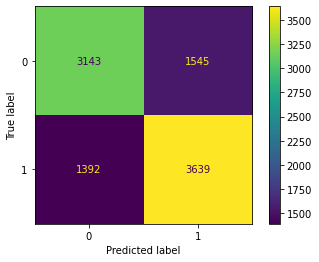

In [13]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test) 